# תרגיל 2 DS - מניות

In [2]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data, wb

# For time stamps
from datetime import datetime

# For division
from __future__ import division

from yahoo_finance import Share
from yahoo_finance import Currency

import time
import sys

In [3]:
# List of stock symbols to analyse
tech_list = ['AAPL', 'GOOG', 'MSFT', 'CVX', 'PTR', 'JNJ', 'PFE', 'NVS', 'MRK']
tech_dfs = {}
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

#Try to get the stock in a loop incase there is RemoteDataError 
for stock in tech_list:
    tries = 10
    while tries > 0:
        try:
            tech_dfs[stock] = data.DataReader(stock, 'yahoo', start, end)
            print('read stock - ' + stock)
            break
        except:
            time.sleep(1)
            tries -= 1
    if not stock in tech_dfs.keys() or tech_dfs[stock] is None:
        print("Something is wrong, Could not get all the stocks data")
        sys.exit(1)
print('Finished reading all stocks.')
#print(tech_dfs)



read stock - AAPL
read stock - GOOG
read stock - MSFT
read stock - CVX
read stock - PTR
read stock - JNJ
read stock - PFE
read stock - NVS
read stock - MRK
Finished reading all stocks.


In [4]:
#Prepare stocks_lists with data to work on
stocks_lists = []
for stock in tech_list:
    stock_web_df = tech_dfs[stock]
    #calculate rolling mean for 50&200 days
    rolling_200_close = stock_web_df['Close'].rolling(window=200, center=False).mean().dropna()
    rolling_50_close = stock_web_df['Close'].rolling(window=50, center=False).mean().dropna()
    #Calculate the percents of change 
    pct_change_200 = rolling_200_close.pct_change(periods=len(rolling_200_close)-1)[-1]
    pct_change_50 = rolling_50_close.pct_change(periods=len(rolling_50_close)-1)[-1]
    #Calculate high&low percents of change mean for 52 weeks
    weekly_stock_web_df = stock_web_df.resample('W').mean()
    high = weekly_stock_web_df['High'].pct_change(periods=52)[-1]
    low = weekly_stock_web_df['Low'].pct_change(periods=52)[-1]

    stock_row = [pct_change_200, pct_change_50, low, high]
    stocks_lists.append(stock_row)        

stocks_df = pd.DataFrame(stocks_lists,columns=['feature50', 'feature200', 'featurelow', 'featurehigh'])
print(stocks_lists)

[[0.070323375416149636, 0.30976769218036559, 0.47323345305028375, 0.47192361723345932], [0.061572846869885067, 0.26237745011980151, 0.35206399095857099, 0.3464072894989787], [0.074876582885014864, 0.31549075329850584, 0.39212602930164331, 0.38119555403972916], [0.016226863688155735, 0.059323054499764716, 0.088589137014670971, 0.091023140142487913], [-0.034708437054032371, -0.11744549840531626, -0.069564315997644788, -0.058525647435897388], [0.043714343777983888, 0.18260937499559571, 0.2053386000287043, 0.20425212820512839], [0.021911464425191207, 0.086878108292741674, 0.092381531193761246, 0.091172067027535109], [0.030490273174298421, 0.12543278017344917, 0.15516066094333714, 0.15853985416389382], [-0.030717236164155115, -0.12240683236840288, -0.05518224937312699, -0.057972218127228303]]


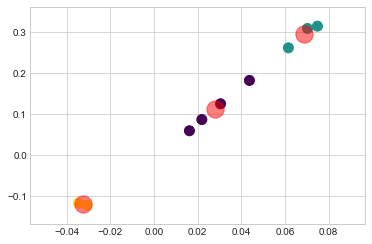

In [5]:
from sklearn.cluster import KMeans
import math
# Do KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(stocks_df)
y_kmeans = kmeans.predict(stocks_df)
centers = kmeans.cluster_centers_

# conver df to matrix for visualization
X = stocks_df.as_matrix(columns=['feature50', 'feature200', 'featurelow', 'featurehigh'])

# calculate the error score
wssse = kmeans.score(stocks_df)

# draw scatter plot for the stocks and centers
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5)
plt.show()


In [6]:
#Mor zohar - 204433346, Coral Ram - 308345446, Or Basson - 311115596